In [131]:
%matplotlib inline
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [132]:
np.random.seed(23)

In [133]:
x0 = np.random.normal(10, 1, 10)
x1 = np.random.normal(2, 1, 10)
xs = np.append(x0, x1)
labels = [1.] * len(x0) + [0.] * len(x1)
#print(xs, labels)

In [134]:
tf.reset_default_graph()

In [135]:
learning_rate = 0.00005
training_epochs = 1000
X = tf.placeholder(tf.float32, name="xtrain")
Y = tf.placeholder(tf.float32, name="ytrain")
w = tf.Variable([0., 0.], name="parameters")

In [136]:
def model(X, w):
    return tf.add(tf.multiply(w[1], tf.pow(X, 1)),tf.multiply(w[0], tf.pow(X, 0)), name="y_predicted")

In [137]:
y_model = model(X, w)
cost = tf.reduce_sum(tf.abs(Y-y_model), name="cost")

In [138]:
train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)
correct_pred = tf.equal(Y, tf.to_float(tf.greater(y_model, 0.5)))
accuracy = tf.reduce_mean(tf.to_float(correct_pred))

In [139]:
cur_acc = tf.summary.scalar("current_average", accuracy)
#cur_cost = tf.summary.scalar("current_cost", cost)
merged = tf.summary.merge_all()

In [140]:
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

In [141]:
write = tf.summary.FileWriter("./logs", sess.graph)

In [142]:
for epoch in range(1,training_epochs):
    sess.run([train_op], feed_dict={X: xs, Y: labels})
    curr_cost, summ = sess.run([cost, merged], feed_dict={X: xs, Y: labels})    
    write.add_summary(summ, epoch)
    if epoch % 100 == 0:
    #w_val = sess.run(w)
    #all_xs = np.linspace(0, 10, 100)
    #ax = plt.subplot(8,8,epoch)
    #ax.plot(all_xs, all_xs*w_val[1] + w_val[0])
    #ax.scatter(xs, labels)
        print(curr_cost)

2.41438
2.26873
2.12262
1.99716
1.9818
1.98172
1.98164
1.98158
1.9815


In [143]:
w_val = sess.run(w)
print('learned parameters', w_val)

print('accuracy', sess.run(accuracy, feed_dict={X: xs, Y: labels}))


learned parameters [-0.11310023  0.10657237]
accuracy 1.0


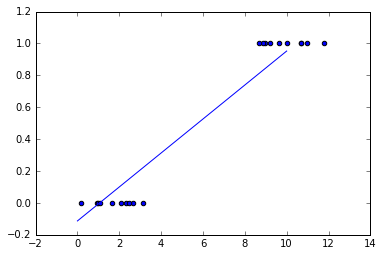

In [144]:
all_xs = np.linspace(0, 10, 100)
plt.plot(all_xs, all_xs*w_val[1] + w_val[0])
plt.scatter(xs, labels)
plt.show()